<a href="https://colab.research.google.com/github/kariche1/kariche1/blob/main/DevoirWeekend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET DATA SCIENCE 1
# Propriétaire: ALEXIS KPOGHOMOU(alexis kariche kpoghomou)

## INSTALLATION DES BIBLITHEQUES ET IMPORTATION DES BIBLIOTHEQUES NECESSAIRES

In [ ]:
# installation des bibliothèques
! pip install numpy pandas matplotlib seaborn
# importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*texte en italique*## CHARGER LES DONNEES

In [ ]:
# Importation du module pour monter Google Drive dans Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# APERCU DU CONTENU MYDRIVE
!ls /content/gdrive/MyDrive

'axb-bkgb-wgc – 6 juin 2024.gjam'
'Certificates grad toolkit (general).gdoc'
'Colab Notebooks'
'COURS SUR LA PROGRAMMATION.pptx'
'Customer Personnality Analysis.pdf'
'DA C1M1 Learning Log Consider how data analysts approach tasks_fr.gdoc'
'DAN-P4-FAO (2).zip'
 data_clean_final.csv
 data_clean_final.xlsx
 data.csv
 datascience
'DEVOIR A RENDRE EN EDA (1).ipynb'
 diabetes.csv
'EDA QUESTIONS.pdf'
'gak-krrh-vpc – 5 juin 2024 (1).gjam'
'gak-krrh-vpc – 5 juin 2024.gjam'
'gak-krrh-vpc – 5 juin 2024.pdf'
 image007.png
 image1.JPG
 image2.JPG
 image3.JPG
 marketing_data.csv
 movies_complete.csv.crdownload
'ODC EDA EXO.gdoc'
'ODC EDA EXO.pdf'
 orders.csv
 Pandas_Dataframe_1653832072.pdf
 Pandas_suite.ipynb
 projet.ipynb
 Python.zip
'Resume Template 1 (1).gdoc'
'Resume Template 1.gdoc'
 Sales_April_2019.csv
 Sales_December_2019.csv
 Sales_December_2019.xlsx
 Titre_Projet_Kpoghomou_Alexis
'UXC5M7 Activity-Template_-Job-search-project-plan_fr.xlsx'


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/diabetes.csv')


In [ ]:
data.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,sex
0,0,Female,80.0,0,1,never,25.19,6.6,NaN,0,NaN
1,1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0,NaN
2,2,Male,28.0,0,0,never,27.32,5.7,NaN,0,NaN
3,3,Female,36.0,0,0,current,23.45,5.0,155.0,0,NaN
4,4,NaN,76.0,1,1,current,20.14,4.8,155.0,0,NaN


## Mapper les valeurs 0 et 1 à des libellés explicites
mapping = {0: "Non hypertendu", 1: "Hypertendu"}
data["hypertension"] = data["hypertension"].map(mapping)

# Convertir la colonne en type catégorie
data["hypertension"] = data["hypertension"].astype("category")

# Afficher les premières lignes pour vérifier
print(data["hypertension"].head())
print(data["hypertension"].cat.categories)

# 1-QUESTION DE MANIPULATION DE DONNEES ET STATISTIQUES DESCRIPTIVE


## 1.1COMPREHENSION GENERALE DU DATASET

In [ ]:
data.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,sex
0,0,Female,80.0,0,1,never,25.19,6.6,NaN,0,NaN
1,1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0,NaN
2,2,Male,28.0,0,0,never,27.32,5.7,NaN,0,NaN
3,3,Female,36.0,0,0,current,23.45,5.0,155.0,0,NaN
4,4,NaN,76.0,1,1,current,20.14,4.8,155.0,0,NaN


In [ ]:
data.tail()

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,sex
99995,99995,NaN,80.0,0,0,No Info,27.32,6.2,NaN,0,NaN
99996,99996,Female,2.0,0,0,No Info,17.37,6.5,100.0,0,NaN
99997,99997,Male,66.0,0,0,former,27.83,5.7,155.0,0,NaN
99998,99998,Female,24.0,0,0,never,NaN,4.0,100.0,0,NaN
99999,99999,Female,57.0,0,0,current,22.43,6.6,90.0,0,NaN


In [ ]:
# 1.Quelles sont les dimensions du dataset (nombre de lignes et de colonnes)
data.shape

(100000, 11)

In [ ]:
# Quelles sont les types de variables presentes dans le dataset
data.dtypes

,0
Unnamed: 0,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,float64
diabetes,int64


### Unnamed: 0 (int64)

Description : Généralement, cette colonne est un identifiant ou un index auto-généré par le système (souvent créé lors de l'exportation du DataFrame) et ne fournit pas d'information spécifique sur les patients.
### gender (object)
Description : Indique le sexe du patient.
Valeurs courantes :
"Male" : Homme
"Famele" : Femme
Remarque : La représentation exacte peut varier (par exemple, "Male"/"Female" ou d'autres codifications), mais la logique reste la même.
### age (float64)

Description : Âge du patient, exprimé en années.
Remarque : Même s’il est en format numérique à virgule flottante, les âges sont généralement des nombres entiers.
### hypertension (int64)

Description : Indique si le patient souffre d’hypertension.
Valeurs :
0 : Absence d’hypertension
1 : Présence d’hypertension
### heart_disease (int64)

Description : Indique si le patient présente une maladie cardiaque.
Valeurs :
0 : Pas de maladie cardiaque
1 : Présence d’une maladie cardiaque
### smoking_history (object)

Description : Historique du tabagisme du patient.
Valeurs possibles (exemples, à adapter selon votre dataset) :
"never smoked" : Le patient n’a jamais fumé
"formerly smoked" : Le patient fumait dans le passé mais a arrêté
"smokes" : Le patient fume actuellement
D’autres catégories ou codifications textuelles peuvent être utilisées pour détailler l’intensité ou la durée du tabagisme.
### bmi (float64)

Description : Indice de masse corporelle (Body Mass Index) du patient, qui est une mesure utilisée pour évaluer la corpulence.
Calcul : Généralement calculé en divisant le poids (en kg) par le carré de la taille (en m).
### HbA1c_level (float64)

Description : Niveau d’HbA1c (hémoglobine glyquée) qui reflète la moyenne des taux de glucose sanguin sur une période d’environ 2 à 3 mois.
Unité : Habituellement exprimé en pourcentage (%) ou parfois en mmol/mol.
#### blood_glucose_level (float64)

Description : Taux de glucose sanguin mesuré lors d’un examen, permettant d’évaluer la glycémie du patient.
Unité : Peut être exprimé en mg/dL ou en mmol/L selon le contexte.
### diabetes (int64)

Description : Indique si le patient est diabétique.
Valeurs :
0 : Non diabétique
1 : Diabétique

In [ ]:
# 3.Y a-t-il des valeurs dupliquées? si oui combien?
data_diplicated =data.duplicated().sum()
print(data_diplicated)
# EN CONCLUSION IL Y A PAS DES VALEURS DUPLIQUEES

0


### Une valeur dupliquée (ou doublon) désigne une donnée qui apparaît plusieurs fois dans un jeu de données. Cela peut concerner une seule colonne ou l'ensemble d'une ligne (enregistrement). Par exemple :

#### Dans une colonne : Si la valeur "Paris" apparaît plusieurs fois dans une colonne qui liste des villes, chacune de ces occurrences (à partir de la deuxième) est considérée comme dupliquée.
#### Dans une ligne : Si toutes les colonnes d'un enregistrement sont identiques à celles d'un autre enregistrement, alors ces lignes sont des doublons.
#### Pourquoi est-ce important ?
#### Nettoyage des données : Les valeurs dupliquées peuvent fausser les analyses statistiques et les résultats de modélisation. Il est donc souvent nécessaire de les identifier et de décider si l'on doit les supprimer ou les traiter différemment.
#### Efficacité : Dans certains cas, conserver des doublons peut ralentir le traitement et augmenter la taille du jeu de données inutilement.


In [ ]:
# 4. Combien de valeurs manquantes y a-t-il par colonne et quel est le pourcentage de données manquantes ?

# Calcul des valeurs manquantes
data_values_manquante = data.isnull().sum()
# calcul pourcentage valeur manquante
pourcentage_valeur_manquante = (data_values_manquante / len(data)) * 100  # Pourcentage

# Création du DataFrame
pourcentage_valeur = pd.DataFrame({
    'Valeurs manquantes': data_values_manquante,
    'Pourcentage (%)': pourcentage_valeur_manquante
})

# Affichage du DataFrame

print(pourcentage_valeur)

                     Valeurs manquantes  Pourcentage (%)
Unnamed: 0                            0              0.0
gender                             5000              5.0
age                                   0              0.0
hypertension                          0              0.0
heart_disease                         0              0.0
smoking_history                    5000              5.0
bmi                                5000              5.0
HbA1c_level                        5000              5.0
blood_glucose_level                5000              5.0
diabetes                              0              0.0
sex                              100000            100.0


In [ ]:
# RESUME STATISTIQUE SANS MEDIANE
statistiques_descriptives = data.describe().select_dtypes(include=['number'])
statistiques_descriptives

,Unnamed: 0,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,sex
count,100000.000000,100000.000000,100000.00000,100000.000000,95000.000000,95000.000000,95000.000000,100000.000000,0.0
mean,49999.500000,41.885856,0.07485,0.039420,27.325113,5.526756,138.060263,0.085000,NaN
std,28867.657797,22.516840,0.26315,0.194593,6.639998,1.071340,40.688907,0.278883,NaN
min,0.000000,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,NaN
25%,24999.750000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,NaN
50%,49999.500000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,NaN
75%,74999.250000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,NaN
max,99999.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,NaN


In [ ]:
# 5. Quels sont les résumés statistiques des variables numériques (moyenne, médiane,min, max, quartiles) ?
statistiques_descriptives = data.describe().select_dtypes(include=['number'])
# Ajouter la médiane aux statistiques
mediane = data.select_dtypes(['number']).median()
statistiques_descriptives.loc["50% (médiane)"] = mediane

print(statistiques_descriptives)

                  Unnamed: 0            age  hypertension  heart_disease  \
count          100000.000000  100000.000000  100000.00000  100000.000000   
mean            49999.500000      41.885856       0.07485       0.039420   
std             28867.657797      22.516840       0.26315       0.194593   
min                 0.000000       0.080000       0.00000       0.000000   
25%             24999.750000      24.000000       0.00000       0.000000   
50%             49999.500000      43.000000       0.00000       0.000000   
75%             74999.250000      60.000000       0.00000       0.000000   
max             99999.000000      80.000000       1.00000       1.000000   
50% (médiane)   49999.500000      43.000000       0.00000       0.000000   

                        bmi   HbA1c_level  blood_glucose_level       diabetes  \
count          95000.000000  95000.000000         95000.000000  100000.000000   
mean              27.325113      5.526756           138.060263       0.085000

#### Colonne : age
#### Cette colonne représente l'âge des patients.

####count : 100 000
#### → Toutes les observations contiennent une information sur l'âge.

#### mean : 41,89
#### → L'âge moyen des patients est d'environ 41,89 ans.

#### std : 22,52
#### → L’écart-type de 22,52 ans indique une dispersion importante des âges autour de la moyenne.

#### min : 0,08
#### → L'âge minimum est de 0,08 an (ce qui pourrait correspondre à un nouveau-né ou une valeur atypique à vérifier).

#### 25% : 24,00
#### → 25 % des patients ont moins de 24 ans.

####50% (médiane) : 43,00
####→ La médiane, qui divise la population en deux groupes égaux, est de 43 ans.

####75% : 60,00
####→ 75 % des patients ont moins de 60 ans.

#### max : 80,00
####→ L'âge maximal observé est de 80 ans.



###  6. Y a-t-il des valeurs aberrantes dans les variables numériques ? Comment lesdétecter ?

In [ ]:

# Sélection des colonnes numériques
data_numerique = data.select_dtypes(include=['number'])

# Détection des valeurs aberrantes avec l'IQR
Q1 = data_numerique.quantile(0.25)  # Premier quartile
Q3 = data_numerique.quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1  # Écart interquartile

# Définition des bornes
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Identification des valeurs aberrantes
outliers = (data_numerique < borne_inf) | (data_numerique > borne_sup)

# Affichage du nombre de valeurs aberrantes par colonne
print(outliers.sum())

Unnamed: 0                0
age                       0
hypertension           7485
heart_disease          3942
bmi                    6736
HbA1c_level            1256
blood_glucose_level    1923
diabetes               8500
sex                       0
dtype: int64


Unnamed: 0                0
age                       0
hypertension           7485
heart_disease          3942
bmi                       0
HbA1c_level               0
blood_glucose_level       0
diabetes               8500
sex                       0
dtype: int64


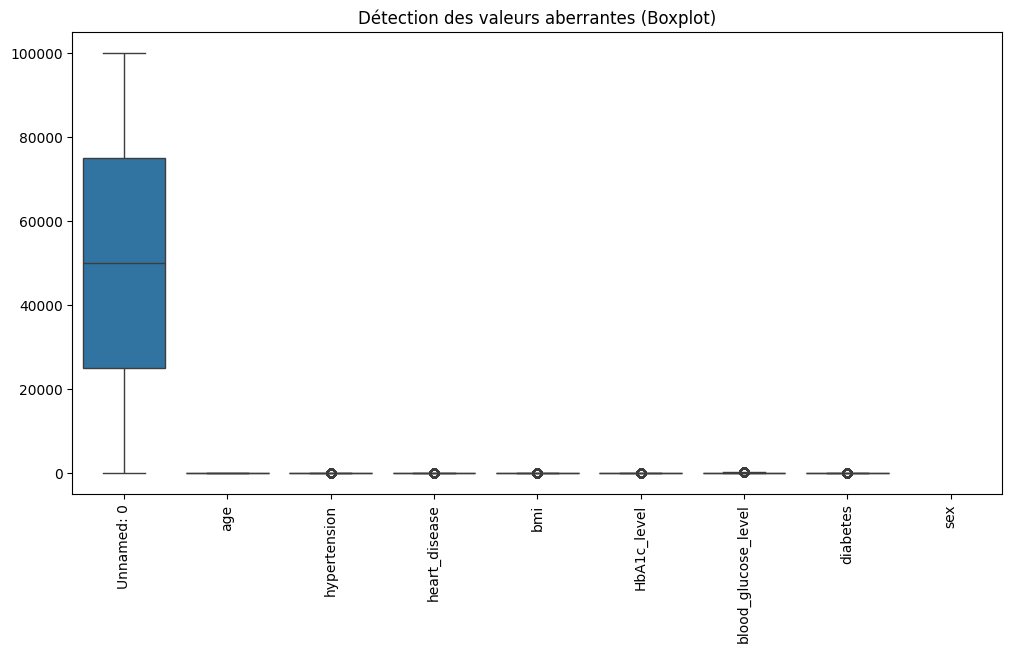

In [ ]:
from scipy.stats import zscore

# Calcul des Z-scores
z_scores = np.abs(zscore(data_numerique))

# Détection des valeurs aberrantes
outliers_zscore = (z_scores > 3)

# Nombre de valeurs aberrantes par colonne
print(outliers_zscore.sum())


# Tracer un boxplot pour chaque variable numérique
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_numerique)
plt.xticks(rotation=90)
plt.title("Détection des valeurs aberrantes (Boxplot)")
plt.show()

In [ ]:
colonnes_categoriques = data.select_dtypes(exclude=['number'])
# Afficher la distribution des valeurs uniques pour chaque colonne catégorique
for col in colonnes_categoriques.columns:
    print(f"\nDistribution des valeurs uniques pour '{col}':")
    print(data[col].value_counts())


Distribution des valeurs uniques pour 'gender':
gender
Female    55682
Male      39300
Other        18
Name: count, dtype: int64

Distribution des valeurs uniques pour 'smoking_history':
smoking_history
No Info        34059
never          33339
former          8881
current         8821
not current     6108
ever            3792
Name: count, dtype: int64


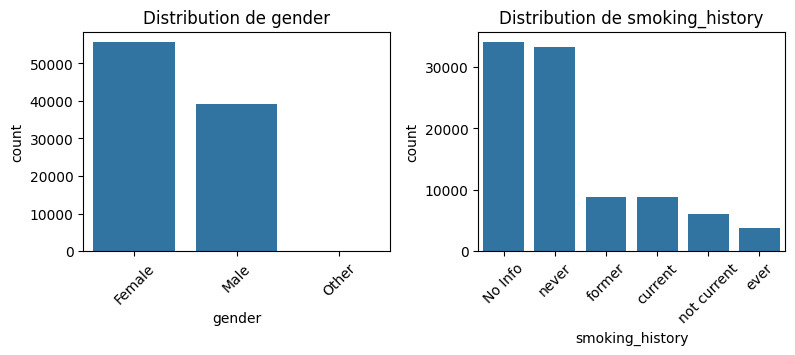

In [ ]:
# Tracer les distributions des colonnes catégoriques
plt.figure(figsize=(12, 6))
for i, col in enumerate(colonnes_categoriques.columns, 1):
    plt.subplot(2, 3, i)  # Ajuste en fonction du nombre de colonnes
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution de {col}")

plt.tight_layout()
plt.show()


### 7-Quelle est la distribution des valeurs uniques dans les colonnes catégoriques (gender, smoking_history, etc.) ?


In [ ]:
# Colonnes catégoriques (à ajuster si nécessaire)
colonnes_categoriques = ["gender", "smoking_history"]

# Afficher la distribution des valeurs uniques par colonne
for col in colonnes_categoriques:
    print(f"Distribution des valeurs uniques pour '{col}':\n")
    print(data[col].value_counts(normalize=True) * 100)  # Affiche en pourcentage
    print("-" * 50)


Distribution des valeurs uniques pour 'gender':

gender
Female    58.612632
Male      41.368421
Other      0.018947
Name: proportion, dtype: float64
--------------------------------------------------
Distribution des valeurs uniques pour 'smoking_history':

smoking_history
No Info        35.851579
never          35.093684
former          9.348421
current         9.285263
not current     6.429474
ever            3.991579
Name: proportion, dtype: float64
--------------------------------------------------


### 8. Quels sont les patients ayant le plus grand et le plus petit indice de masse corporelle (BMI) ?


In [ ]:
# Trouver le patient avec le plus grand BMI
patient_max_bmi = data.loc[data["bmi"].idxmax()]

# Trouver le patient avec le plus petit BMI
patient_min_bmi = data.loc[data["bmi"].idxmin()]

# Afficher les résultats
print("Patient avec le BMI le plus élevé :\n", patient_max_bmi, "\n")
print("Patient avec le BMI le plus faible :\n", patient_min_bmi)


Patient avec le BMI le plus élevé :
 Unnamed: 0               87843
gender                    Male
age                        7.0
hypertension                 0
heart_disease                0
smoking_history        No Info
bmi                      95.69
HbA1c_level                6.1
blood_glucose_level      130.0
diabetes                     0
sex                        NaN
Name: 87843, dtype: object 

Patient avec le BMI le plus faible :
 Unnamed: 0                3630
gender                     NaN
age                       80.0
hypertension                 0
heart_disease                0
smoking_history        No Info
bmi                      10.01
HbA1c_level                6.0
blood_glucose_level      100.0
diabetes                     0
sex                        NaN
Name: 3630, dtype: object


### BMI (body mass index)
### Explication :
###  idxmax() → Renvoie l'index du patient ayant le BMI maximum.
### idxmin() → Renvoie l'index du patient ayant le BMI minimum.
### loc[] → Récupère les informations du patient correspondant.



In [ ]:
data.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,sex
0,0,Female,80.0,0,1,never,25.19,6.6,NaN,0,NaN
1,1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0,NaN
2,2,Male,28.0,0,0,never,27.32,5.7,NaN,0,NaN
3,3,Female,36.0,0,0,current,23.45,5.0,155.0,0,NaN
4,4,NaN,76.0,1,1,current,20.14,4.8,155.0,0,NaN


#Analyse Univariée





##9. Quelle est la moyenne, la médiane et l’écart-type de l’âge des patients ?

In [ ]:
# Calculer les statistiques sur l'âge
age_moyenne = data["age"].mean()
age_mediane = data["age"].median()
age_ecart_type = data["age"].std()

# Afficher les résultats
print(f"Moyenne de l'âge : {age_moyenne:.2f} ans")
print(f"Médiane de l'âge : {age_mediane} ans")
print(f"Écart-type de l'âge : {age_ecart_type:.2f} ans")


Moyenne de l'âge : 41.89 ans
Médiane de l'âge : 43.0 ans
Écart-type de l'âge : 22.52 ans


## 10. Quelle est la proportion de patients ayant une hypertension ?


In [ ]:
# Vérifier les valeurs uniques dans la colonne hypertension
print(data["hypertension"].value_counts())

# Calculer la proportion de patients hypertendus
prop_hypertension = data["hypertension"].mean() * 100  # Supposant que 1 = hypertension, 0 = non

# Afficher le résultat
print(f"Proportion de patients ayant une hypertension : {prop_hypertension:.2f}%")

hypertension
0    92515
1     7485
Name: count, dtype: int64
Proportion de patients ayant une hypertension : 7.49%




## 11. Quelle est la répartition des niveaux d’HbA1c ?

count    95000.000000
mean         5.526756
std          1.071340
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: HbA1c_level, dtype: float64


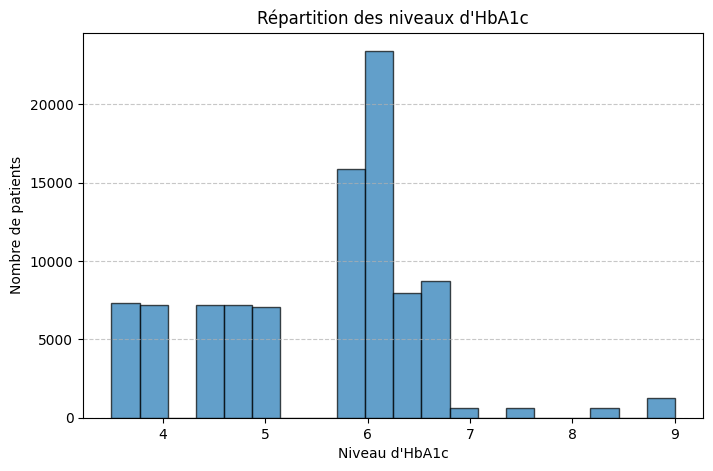

In [ ]:
# Vérifier les statistiques de la colonne HbA1c
print(data["HbA1c_level"].describe())

# Tracer un histogramme pour visualiser la répartition
plt.figure(figsize=(8,5))
plt.hist(data["HbA1c_level"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Niveau d'HbA1c")
plt.ylabel("Nombre de patients")
plt.title("Répartition des niveaux d'HbA1c")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## 12. Quelle est la distribution du taux de glucose sanguin ?


count    95000.000000
mean       138.060263
std         40.688907
min         80.000000
25%        100.000000
50%        140.000000
75%        159.000000
max        300.000000
Name: blood_glucose_level, dtype: float64


Text(0.5, 1.0, 'Distribution du taux de glucose sanguin')

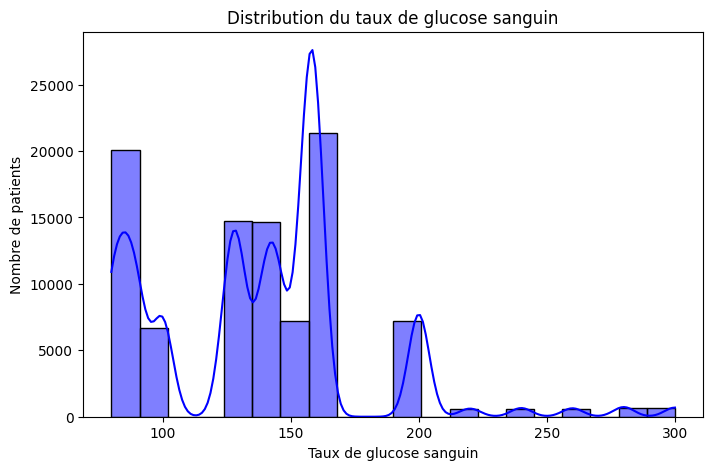

In [ ]:
# Vérifier les statistiques de la colonne glucose
print(data["blood_glucose_level"].describe())

# Tracer un histogramme pour visualiser la distribution
plt.figure(figsize=(8,5))
sns.histplot(data["blood_glucose_level"], bins=20, kde=True, color="blue")
plt.xlabel("Taux de glucose sanguin")
plt.ylabel("Nombre de patients")
plt.title("Distribution du taux de glucose sanguin")


## 13. Y a-t-il une différence dans l'âge moyen entre les patients atteints de diabète et ceux qui ne le sont pas ?


Âge moyen des patients atteints de diabète : 60.95 ans
Âge moyen des patients non atteints de diabète : 40.12 ans


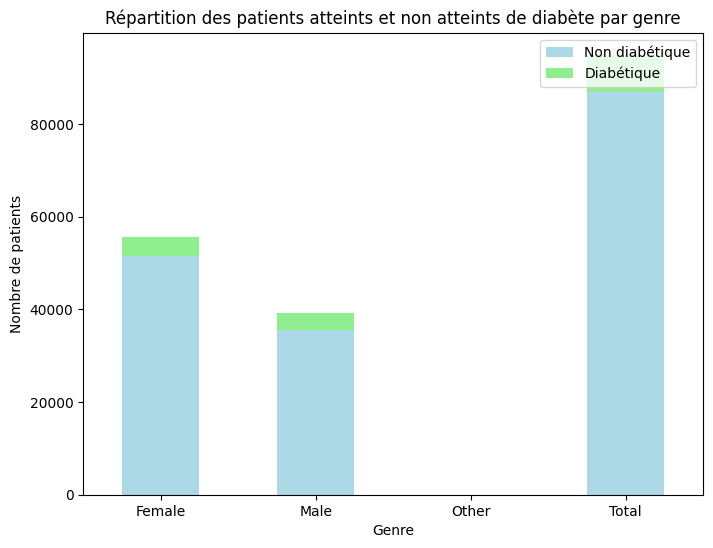

In [ ]:
# Calculer la moyenne d'âge pour les patients atteints de diabète et ceux non atteints
age_moyenne_diabete = data[data["diabetes"] == 1]["age"].mean()  # Diabète = 1
age_moyenne_non_diabete = data[data["diabetes"] == 0]["age"].mean()  # Diabète = 0

# Afficher les résultats
print(f"Âge moyen des patients atteints de diabète : {age_moyenne_diabete:.2f} ans")
print(f"Âge moyen des patients non atteints de diabète : {age_moyenne_non_diabete:.2f} ans")
# Créer un tableau croisé dynamique pour l'exemple avec la variable "diabetes" et "gender"
table = pd.crosstab(data["gender"], data["diabetes"], margins=True, margins_name="Total")

# Créer le graphique à barres empilées
table.drop(columns="Total").plot(kind="bar", stacked=True, color=["lightblue", "lightgreen"], figsize=(8, 6))

# Ajouter des labels et un titre
plt.title("Répartition des patients atteints et non atteints de diabète par genre")
plt.xlabel("Genre")
plt.ylabel("Nombre de patients")
plt.xticks(rotation=0)  # Garder les étiquettes horizontales pour une meilleure lisibilité

# Afficher la légende
plt.legend(["Non diabétique", "Diabétique"], loc="upper right")

# Afficher le graphique
plt.show()

# Analyse Bivariée et Corrélation


## 14. Les patients atteints de diabète ont-ils tendance à avoir un BMI plus élevé que les non-diabétiques ?

Moyenne du BMI des patients atteints de diabète : 31.98
Moyenne du BMI des patients non atteints de diabète : 26.89
Valeur du test t : nan
Valeur p : nan
La différence n'est pas statistiquement significative.


<ipython-input-55-0e6241ceaf8c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diabetes", y="bmi", data=data, palette="Set2")


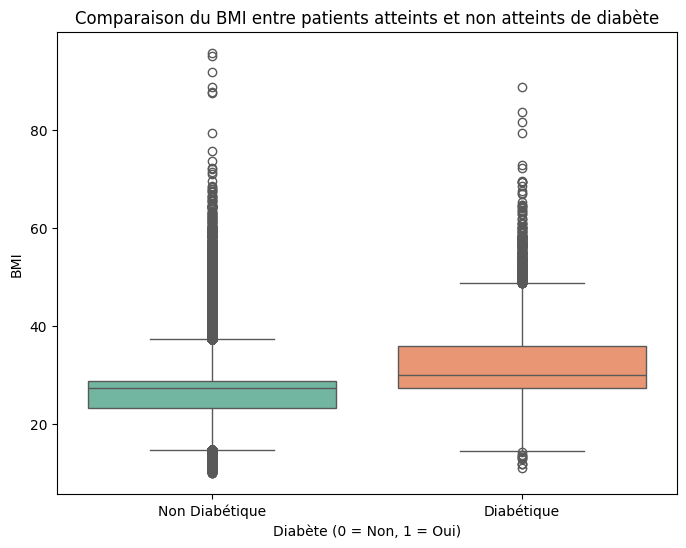

In [ ]:
# Calculer la moyenne du BMI pour les patients atteints de diabète et non diabétiques
bmi_moyenne_diabete = data[data["diabetes"] == 1]["bmi"].mean()  # Diabète = 1
bmi_moyenne_non_diabete = data[data["diabetes"] == 0]["bmi"].mean()  # Diabète = 0

# Afficher les résultats
print(f"Moyenne du BMI des patients atteints de diabète : {bmi_moyenne_diabete:.2f}")
print(f"Moyenne du BMI des patients non atteints de diabète : {bmi_moyenne_non_diabete:.2f}")
from scipy import stats

# Extraire les BMI pour les deux groupes
bmi_diabete = data[data["diabetes"] == 1]["bmi"]
bmi_non_diabete = data[data["diabetes"] == 0]["bmi"]

# Effectuer le test t
t_stat, p_value = stats.ttest_ind(bmi_diabete, bmi_non_diabete)

# Afficher le résultat
print(f"Valeur du test t : {t_stat:.2f}")
print(f"Valeur p : {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("La différence est statistiquement significative.")
else:
    print("La différence n'est pas statistiquement significative.")
# Tracer un boxplot pour comparer les BMI entre les deux groupes
plt.figure(figsize=(8,6))
sns.boxplot(x="diabetes", y="bmi", data=data, palette="Set2")

# Ajouter des labels et un titre
plt.title("Comparaison du BMI entre patients atteints et non atteints de diabète")
plt.xlabel("Diabète (0 = Non, 1 = Oui)")
plt.ylabel("BMI")
plt.xticks([0, 1], ['Non Diabétique', 'Diabétique'])

# Afficher le graphique
plt.show()


🎯 Conclusion :
Si la moyenne des BMI des diabétiques est significativement plus élevée que celle des non-diabétiques et que le test t montre une valeur p inférieure à 0.05, cela suggère qu'il y a une différence statistiquement significative.
Le boxplot vous aidera à visualiser cette différence et à vérifier si les distributions de BMI sont différentes entre les groupes.
Cela vous permettra d'explorer si les diabétiques ont tendance à avoir un BMI plus élevé.

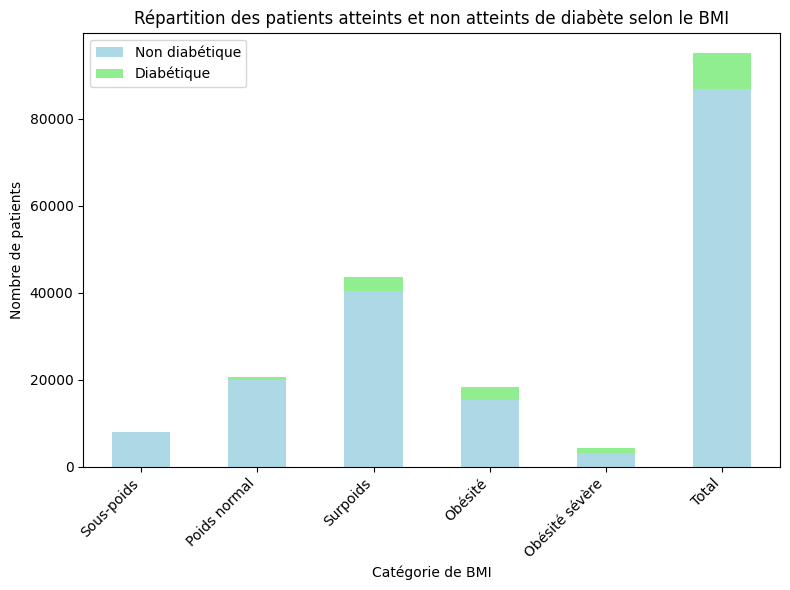

In [ ]:
# Définir des catégories de BMI
bins = [0, 18.5, 24.9, 29.9, 40, float('inf')]  # Catégories : sous-poids, poids normal, surpoids, obésité
labels = ['Sous-poids', 'Poids normal', 'Surpoids', 'Obésité', 'Obésité sévère']
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels)

# Créer un tableau croisé dynamique pour la répartition par catégorie de BMI et diabète
table = pd.crosstab(data['bmi_category'], data['diabetes'], margins=True, margins_name="Total")

# Créer le graphique à barres empilées
table.drop(columns="Total").plot(kind="bar", stacked=True, color=["lightblue", "lightgreen"], figsize=(8,6))

# Ajouter des labels et un titre
plt.title("Répartition des patients atteints et non atteints de diabète selon le BMI")
plt.xlabel("Catégorie de BMI")
plt.ylabel("Nombre de patients")
plt.xticks(rotation=45, ha="right")

# Afficher la légende
plt.legend(["Non diabétique", "Diabétique"], loc="upper left")

# Afficher le graphique
plt.tight_layout()
plt.show()


Explication du code :
Catégorisation du BMI :
Nous définissons des catégories de BMI (par exemple, sous-poids, poids normal, surpoids, etc.) à l'aide de pd.cut().
Table croisée :
Nous utilisons pd.crosstab() pour compter combien de patients atteints et non atteints de diabète se trouvent dans chaque catégorie de BMI.
Graphique à barres empilées :
plot(kind="bar", stacked=True) crée le graphique à barres empilées, où chaque barre représente une catégorie de BMI et est divisée entre diabétiques et non diabétiques.
Cela vous donnera une vue d'ensemble de la distribution des patients en fonction de leur BMI et de leur statut diabétique, dans un graphique à barres empilées.

In [ ]:
data.head()

,Unnamed: 0,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,sex,bmi_category
0,0,Female,80.0,0,1,never,25.19,6.6,NaN,0,NaN,Surpoids
1,1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0,NaN,Surpoids
2,2,Male,28.0,0,0,never,27.32,5.7,NaN,0,NaN,Surpoids
3,3,Female,36.0,0,0,current,23.45,5.0,155.0,0,NaN,Poids normal
4,4,NaN,76.0,1,1,current,20.14,4.8,155.0,0,NaN,Poids normal


## 15. Le tabagisme est-il plus fréquent chez les patients diabétiques ?


In [ ]:
# Calculer la proportion de fumeurs chez les diabétiques et les non-diabétiques
prop_fumeurs_diabete = (data[data["diabetes"] == 1]["smoking_history"].notna().sum() / len(data[data["diabetes"] == 1])) * 100
prop_fumeurs_non_diabete = (data[data["diabetes"] == 0]["smoking_history"].notna().sum() / len(data[data["diabetes"] == 0])) * 100

# Afficher les résultats
print(f"Proportion de fumeurs chez les patients diabétiques : {prop_fumeurs_diabete:.2f}%")
print(f"Proportion de fumeurs chez les patients non diabétiques : {prop_fumeurs_non_diabete:.2f}%")

Proportion de fumeurs chez les patients diabétiques : 94.94%
Proportion de fumeurs chez les patients non diabétiques : 95.01%


Explication :
notna() : Cette méthode permet de vérifier si les patients ont une valeur renseignée dans la colonne smoking_history, ce qui implique qu'ils fument.
Proportion de fumeurs : Le calcul de la proportion est effectué en divisant le nombre de fumeurs par le nombre total de patients dans chaque groupe (diabétiques et non diabétiques), puis en multipliant par 100 pour obtenir un pourcentage.
2. Visualisation avec un graphique à barres empilées
Pour une visualisation plus intuitive, vous pouvez créer un graphique à barres empilées qui compare la répartition des fumeurs et non-fumeurs parmi les patients diabétiques et non diabétiques.

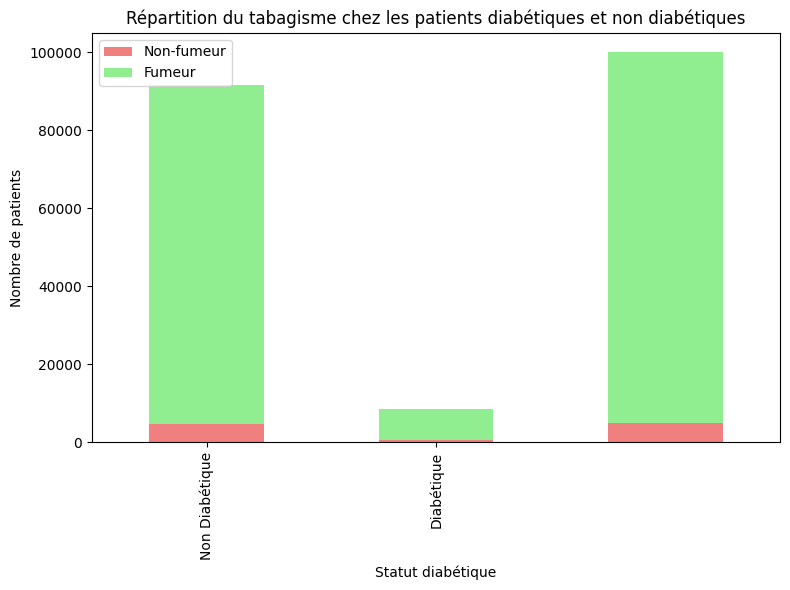

In [ ]:
# Créer un tableau croisé dynamique pour la répartition du tabagisme entre diabétiques et non diabétiques
table = pd.crosstab(data["diabetes"], data["smoking_history"].notna(), margins=True, margins_name="Total")

# Renommer les colonnes pour plus de clarté
table.columns = ["Non-fumeur", "Fumeur", "Total"]

# Créer un graphique à barres empilées
table.drop(columns="Total").plot(kind="bar", stacked=True, color=["lightcoral", "lightgreen"], figsize=(8,6))

# Ajouter des labels et un titre
plt.title("Répartition du tabagisme chez les patients diabétiques et non diabétiques")
plt.xlabel("Statut diabétique")
plt.ylabel("Nombre de patients")
plt.xticks([0, 1], ['Non Diabétique', 'Diabétique'])

# Afficher la légende
plt.legend(["Non-fumeur", "Fumeur"], loc="upper left")

# Afficher le graphique
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Créer une table de contingence pour le test du chi-carré
table_contingence = pd.crosstab(data["diabetes"], data["smoking_history"].notna())

# Effectuer le test du chi-carré
chi2, p, dof, expected = chi2_contingency(table_contingence)

# Afficher le résultat
print(f"Valeur p du test du Chi-carré : {p:.4f}")

# Conclusion
if p < 0.05:
    print("Le tabagisme est significativement lié au statut diabétique.")
else:
    print("Le tabagisme n'est pas significativement lié au statut diabétique.")

Valeur p du test du Chi-carré : 0.8149
Le tabagisme n'est pas significativement lié au statut diabétique.


🎯 Explication :
notna() dans df["smoking_history"].notna() permet d'identifier les fumeurs.
Graphique empilé : Le graphique montre la répartition des fumeurs et non-fumeurs parmi les diabétiques et non diabétiques.
3. Test statistique (si besoin)
Si vous souhaitez savoir si la différence entre les groupes est statistiquement significative, vous pouvez utiliser un test du chi-carré pour tester l'indépendance entre le diabète et le tabagisme

## 16. Quel est le lien entre l’hypertension et le diabète ?


### 1. Comparer la proportion de patients hypertendus entre les diabétiques et non diabétiques
Commencez par calculer la proportion de patients hypertendus dans chaque groupe (diabétiques et non diabétiques).



In [ ]:
# Calculer la proportion de patients hypertendus chez les diabétiques et les non-diabétiques
prop_hypertension_diabete = (data[data["diabetes"] == 1]["hypertension"].sum() / len(data[data["diabetes"] == 1])) * 100
prop_hypertension_non_diabete = (data[data["diabetes"] == 0]["hypertension"].sum() / len(data[data["diabetes"] == 0])) * 100

# Afficher les résultats
print(f"Proportion de patients hypertendus chez les diabétiques : {prop_hypertension_diabete:.2f}%")
print(f"Proportion de patients hypertendus chez les non diabétiques : {prop_hypertension_non_diabete:.2f}%")


Proportion de patients hypertendus chez les diabétiques : 24.56%
Proportion de patients hypertendus chez les non diabétiques : 5.90%


🎯 Explication :
Le calcul de la proportion d'hypertension est effectué en divisant le nombre de patients hypertendus par le nombre total de patients dans chaque groupe (diabétiques et non diabétiques), puis en multipliant par 100 pour obtenir un pourcentage.


### 2-Visualisation avec un graphique à barres empilées
Un graphique à barres empilées permet de visualiser la répartition des patients hypertendus et non hypertendus parmi les patients diabétiques et non diabétiques.



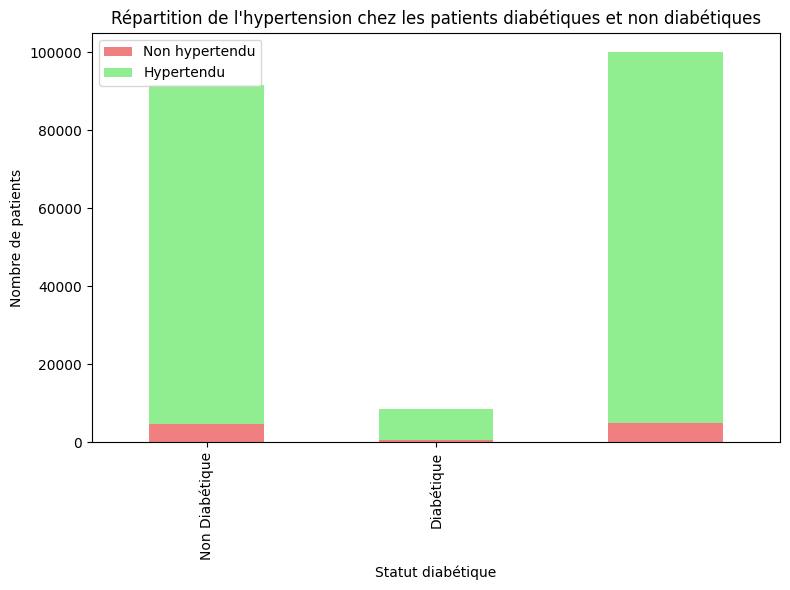

In [ ]:
# Renommer les colonnes pour plus de clarté
table.columns = ["Non hypertendu", "Hypertendu", "Total"]

# Créer un graphique à barres empilées
table.drop(columns="Total").plot(kind="bar", stacked=True, color=["lightcoral", "lightgreen"], figsize=(8,6))

# Ajouter des labels et un titre
plt.title("Répartition de l'hypertension chez les patients diabétiques et non diabétiques")
plt.xlabel("Statut diabétique")
plt.ylabel("Nombre de patients")
plt.xticks([0, 1], ['Non Diabétique', 'Diabétique'])

# Afficher la légende
plt.legend(["Non hypertendu", "Hypertendu"], loc="upper left")

# Afficher le graphique
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Créer une table de contingence pour le test du chi-carré
table_contingence = pd.crosstab(data["diabetes"], data["hypertension"])

# Effectuer le test du chi-carré
chi2, p, dof, expected = chi2_contingency(table_contingence)

# Afficher le résultat
print(f"Valeur p du test du Chi-carré : {p:.4f}")

# Conclusion
if p < 0.05:
    print("L'hypertension est significativement liée au statut diabétique.")
else:
    print("L'hypertension n'est pas significativement liée au statut diabétique.")


Valeur p du test du Chi-carré : 0.0000
L'hypertension est significativement liée au statut diabétique.


## 17. Y a-t-il une corrélation entre le niveau d’HbA1c et le taux de glucose sanguin ? 18. Les femmes sont-elles plus ou moins susceptibles d’avoir le diabète que les hommes ?


###Pour analyser la corrélation entre le niveau d'HbA1c et le taux de glucose sanguin, nous pouvons utiliser la corrélation de Pearson, qui mesure la force et la direction d'une relation linéaire entre deux variables continues.



In [ ]:
# Vérifier que les colonnes sont bien numériques
data['HbA1c_level'] = pd.to_numeric(data['HbA1c_level'], errors='coerce')
data['blood_glucose_level'] = pd.to_numeric(data['blood_glucose_level'], errors='coerce')

# Calcul de la corrélation de Pearson
correlation = data['HbA1c_level'].corr(data['blood_glucose_level'])
print(f"Corrélation entre HbA1c et Glucose : {correlation:.2f}")


Corrélation entre HbA1c et Glucose : 0.17


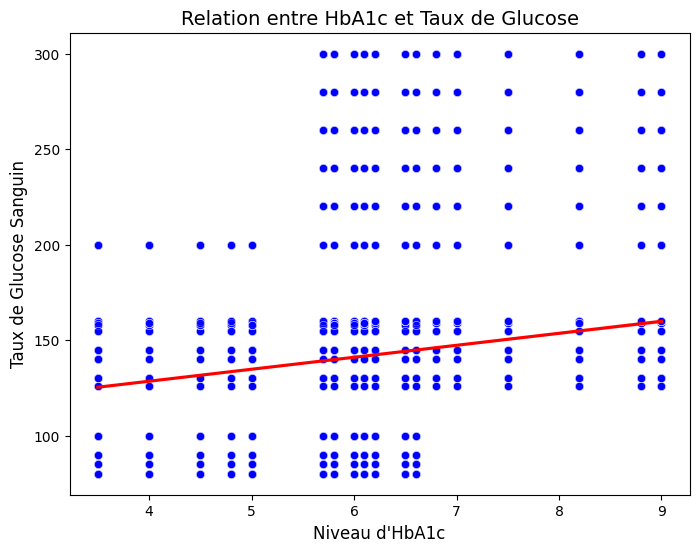

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['HbA1c_level'], y=data['blood_glucose_level'], alpha=0.7, color='blue')

# Ajout de la droite de tendance
sns.regplot(x=data['HbA1c_level'], y=data['blood_glucose_level'], scatter=False, color='red')

# Ajout des titres et labels
plt.title("Relation entre HbA1c et Taux de Glucose", fontsize=14)
plt.xlabel("Niveau d'HbA1c", fontsize=12)
plt.ylabel("Taux de Glucose Sanguin", fontsize=12)

plt.show()

### visualisation sous forme de stacked bar chats

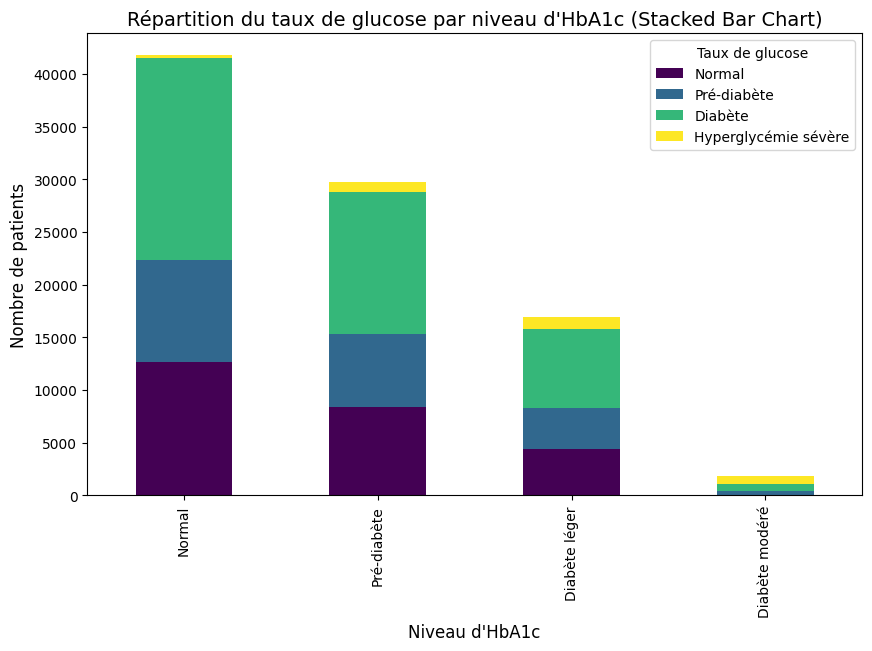

In [ ]:
# Définir les catégories pour HbA1c
bins_hba1c = [0, 5.7, 6.4, 7.5, 10, 15]  # Catégories arbitraires
labels_hba1c = ["Normal", "Pré-diabète", "Diabète léger", "Diabète modéré", "Diabète sévère"]
data["HbA1c_category"] = pd.cut(data["HbA1c_level"], bins=bins_hba1c, labels=labels_hba1c)

# Définir les catégories pour le taux de glucose
bins_glucose = [0, 100, 140, 200, 300]  # Catégories arbitraires
labels_glucose = ["Normal", "Pré-diabète", "Diabète", "Hyperglycémie sévère"]
data["Glucose_category"] = pd.cut(data["blood_glucose_level"], bins=bins_glucose, labels=labels_glucose)

# Créer un tableau croisé des catégories
cross_tab = pd.crosstab(data["HbA1c_category"], data["Glucose_category"])

# Tracer le diagramme en barres empilées
cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))

# Ajouter un titre et des labels
plt.title("Répartition du taux de glucose par niveau d'HbA1c (Stacked Bar Chart)", fontsize=14)
plt.xlabel("Niveau d'HbA1c", fontsize=12)
plt.ylabel("Nombre de patients", fontsize=12)
plt.legend(title="Taux de glucose")

# Afficher le graphique
plt.show()

###  Interprétation des résultats :
### Si la corrélation est proche de +1 → Forte relation positive : un HbA1c élevé est associé à un taux de glucose élevé.
### Si la corrélation est proche de 0 → Pas de relation significative entre les deux variables.
### Si la corrélation est proche de -1 → Relation négative (ce qui serait surprenant ici).texte en italique


🎯 Interprétation de la corrélation :
Une corrélation positive (proche de +1) signifie qu'à mesure que l'HbA1c augmente, le taux de glucose sanguin augmente également.
Une corrélation négative (proche de -1) signifie qu'à mesure que l'HbA1c augmente, le taux de glucose sanguin diminue.
Une corrélation proche de 0 indique qu'il n'y a pas de relation linéaire forte entre les deux variables.


### 18-Les femmes sont-elles plus ou moins susceptibles d’avoir le diabète que les hommes ?


In [ ]:
# Calculer la proportion de diabétiques chez les femmes et les hommes
prop_diabete_femmes = (data[data["gender"] == "Female"]["diabetes"].sum() / len(data[data["gender"] == "Female"])) * 100
prop_diabete_hommes = (data[data["gender"] == "Male"]["diabetes"].sum() / len(data[data["gender"] == "Male"])) * 100

# Afficher les résultats
print(f"Proportion de diabétiques chez les femmes : {prop_diabete_femmes:.2f}%")
print(f"Proportion de diabétiques chez les hommes : {prop_diabete_hommes:.2f}%")


Proportion de diabétiques chez les femmes : 7.55%
Proportion de diabétiques chez les hommes : 9.74%


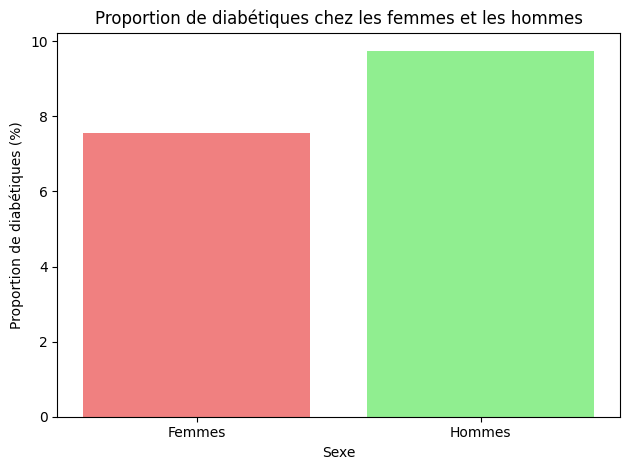

In [ ]:
# Créer un tableau avec les proportions
proportions = [prop_diabete_femmes, prop_diabete_hommes]
labels = ['Femmes', 'Hommes']

# Créer le graphique
plt.bar(labels, proportions, color=['lightcoral', 'lightgreen'])

# Ajouter un titre et des labels
plt.title("Proportion de diabétiques chez les femmes et les hommes")
plt.ylabel("Proportion de diabétiques (%)")
plt.xlabel("Sexe")

# Afficher le graphique
plt.tight_layout()
plt.show()


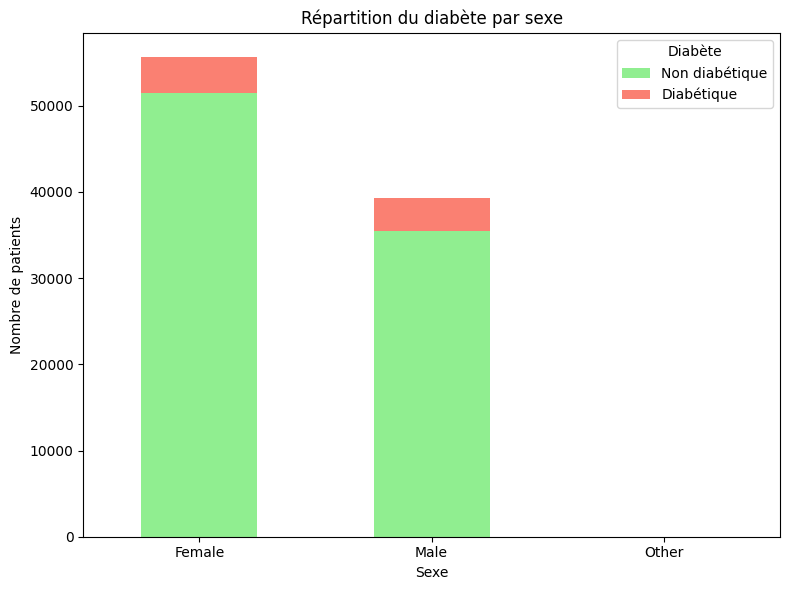

In [ ]:
# Créer une table croisée entre le sexe et le diabète
table = pd.crosstab(data["gender"], data["diabetes"])

# Renommer les colonnes pour plus de clarté
table.columns = ["Non diabétique", "Diabétique"]

# Créer le graphique à barres empilées
table.plot(kind="bar", stacked=True, figsize=(8,6), color=["lightgreen", "salmon"])

# Ajouter un titre et des labels
plt.title("Répartition du diabète par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de patients")
plt.xticks(rotation=0)
plt.legend(title="Diabète", loc="upper right")

# Afficher le graphique
plt.tight_layout()
plt.show()

### 19. Le niveau de glucose sanguin varie-t-il en fonction de l’âge ?


                 age  blood_glucose_level
count  100000.000000         95000.000000
mean       41.885856           138.060263
std        22.516840            40.688907
min         0.080000            80.000000
25%        24.000000           100.000000
50%        43.000000           140.000000
75%        60.000000           159.000000
max        80.000000           300.000000
Coefficient de corrélation entre l'âge et le taux de glucose sanguin : 0.11


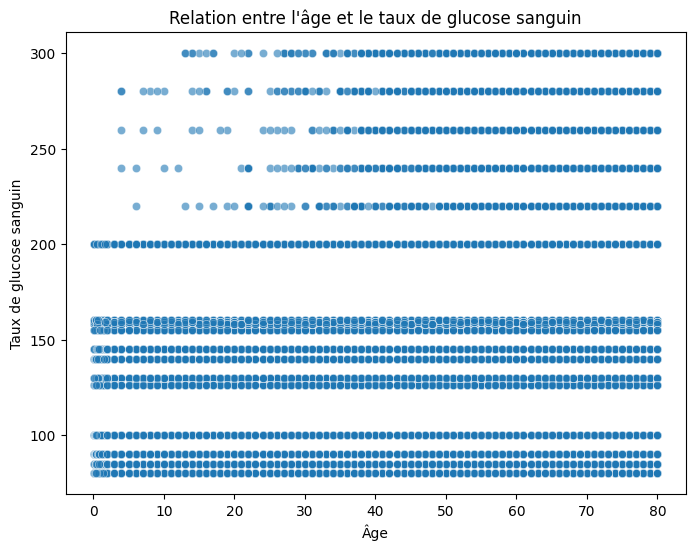

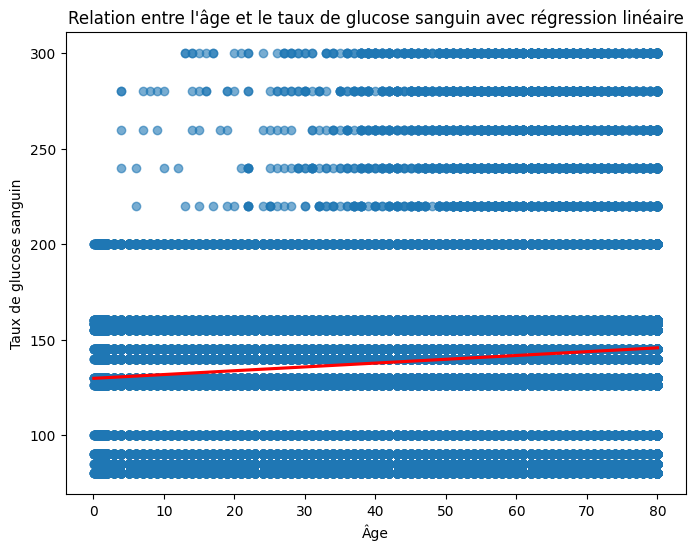

In [ ]:
# 1. Afficher quelques statistiques pour vérifier les colonnes
print(data[['age', 'blood_glucose_level']].describe())

# 2. Calculer le coefficient de corrélation entre l'âge et le taux de glucose sanguin
correlation = data['age'].corr(data['blood_glucose_level'])
print(f"Coefficient de corrélation entre l'âge et le taux de glucose sanguin : {correlation:.2f}")

# 3. Tracer un scatter plot pour visualiser la relation
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='age', y='blood_glucose_level', alpha=0.6)
plt.xlabel("Âge")
plt.ylabel("Taux de glucose sanguin")
plt.title("Relation entre l'âge et le taux de glucose sanguin")
plt.show()

# 4. Visualisation avec régression linéaire (ligne de tendance)
plt.figure(figsize=(8,6))
sns.regplot(data=data, x='age', y='blood_glucose_level', scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.xlabel("Âge")
plt.ylabel("Taux de glucose sanguin")
plt.title("Relation entre l'âge et le taux de glucose sanguin avec régression linéaire")
plt.show()


### Explications :
Statistiques descriptives :

La méthode describe() permet d’avoir un aperçu rapide des distributions des variables age et blood_glucose_level.
Coefficient de corrélation :

La fonction corr() calcule le coefficient de corrélation de Pearson, qui mesure la force et la direction de la relation linéaire entre l'âge et le taux de glucose sanguin.
Un coefficient proche de +1 indique une forte corrélation positive, tandis qu’un coefficient proche de -1 indique une forte corrélation négative. Une valeur proche de 0 indique peu ou pas de relation linéaire.
Scatter plot :

Ce graphique permet de visualiser la dispersion des points (chaque point représentant un patient) en fonction de leur âge et de leur taux de glucose.
Régression linéaire :

Le graphique avec sns.regplot() trace une droite de régression qui aide à visualiser la tendance générale (si le taux de glucose tend à augmenter ou diminuer avec l’âge).


### 20. Les patients atteints de maladies cardiaques sont-ils plus susceptibles d’être diabétiques ?

Table de contingence :
                          Non diabétique  Diabétique
Pas de maladie cardiaque           88825        7233
Maladie cardiaque                   2675        1267

Proportion de diabétiques par groupe :
Pas de maladie cardiaque     7.529826
Maladie cardiaque           32.141045
dtype: float64

Test du Chi-carré : chi2 = 2945.85, p-value = 0.0000
Il existe une association significative entre la maladie cardiaque et le diabète.


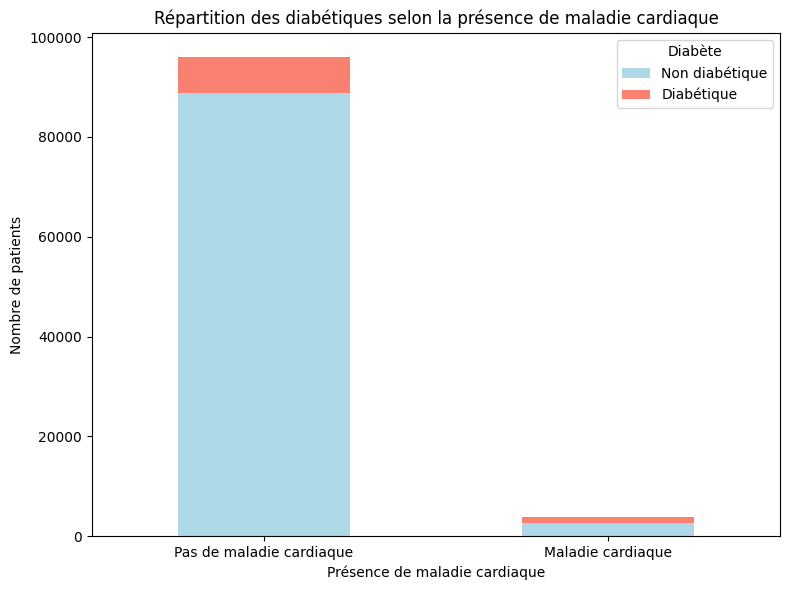

In [ ]:
from scipy.stats import chi2_contingency
# Créer une table de contingence pour 'heart_disease' et 'diabetes'
table = pd.crosstab(data["heart_disease"], data["diabetes"])

# Définir des noms plus explicites pour les index et colonnes
table.index = ["Pas de maladie cardiaque", "Maladie cardiaque"]
table.columns = ["Non diabétique", "Diabétique"]

# Afficher la table de contingence
print("Table de contingence :")
print(table)

# Calculer la proportion de diabétiques dans chaque groupe
total_par_groupe = table.sum(axis=1)
prop_diabete = (table["Diabétique"] / total_par_groupe) * 100
print("\nProportion de diabétiques par groupe :")
print(prop_diabete)

# Effectuer le test du Chi-carré
chi2, p, dof, expected = chi2_contingency(table)
print(f"\nTest du Chi-carré : chi2 = {chi2:.2f}, p-value = {p:.4f}")

# Interprétation du test du Chi-carré
if p < 0.05:
    print("Il existe une association significative entre la maladie cardiaque et le diabète.")
else:
    print("Il n'existe pas d'association significative entre la maladie cardiaque et le diabète.")

# Visualisation avec un graphique à barres empilées
table.plot(kind="bar", stacked=True, figsize=(8,6), color=["lightblue", "salmon"])
plt.title("Répartition des diabétiques selon la présence de maladie cardiaque")
plt.xlabel("Présence de maladie cardiaque")
plt.ylabel("Nombre de patients")
plt.legend(title="Diabète", loc="upper right")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### La fonction chi2_contingency vous aide à tester si deux variables catégorielles sont indépendantes ou associées.

### Si, par exemple, la proportion de diabétiques est plus élevée dans le groupe des patients atteints de maladies cardiaques et que le test du chi-carré est significatif (p-value < 0.05), vous pourrez conclure que les patients atteints de maladies cardiaques sont effectivement plus susceptibles d’être diabétiques.

# 2. Questions de Visualisation avec Matplotlib et Seaborn

## Visualisation Univariée

### 21.Créez un histogramme de la répartition de l’âge des patients.

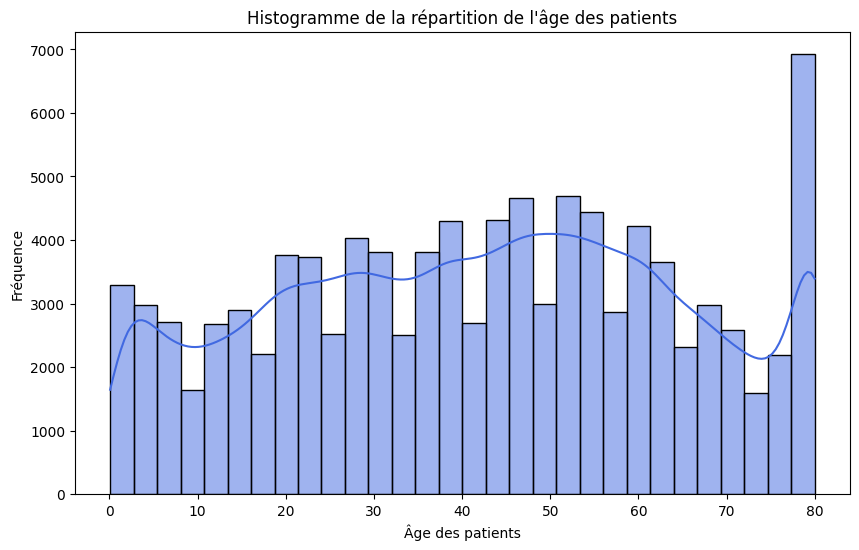

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que la colonne "age" contient l'âge des patients
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color='royalblue')

# Ajout de labels et titre
plt.xlabel("Âge des patients")
plt.ylabel("Fréquence")
plt.title("Histogramme de la répartition de l'âge des patients")

# Affichage du graphique
plt.show()

#### sns.histplot(data['age'], bins=30, kde=True, color='royalblue')bins=30 : Divise les âges en 30 intervalles.
#### kde=True : Ajoute une courbe de densité pour une meilleure visualisation.
####*color*='royalblue' : Définit la couleur de l'histogramme.
####plt.xlabel() et plt.ylabel() : Ajout des noms des axes.
####plt.title() : Ajout du titre du graphique.
####plt.show() : Affiche l'histogramme.


### representatin en staked bar chats

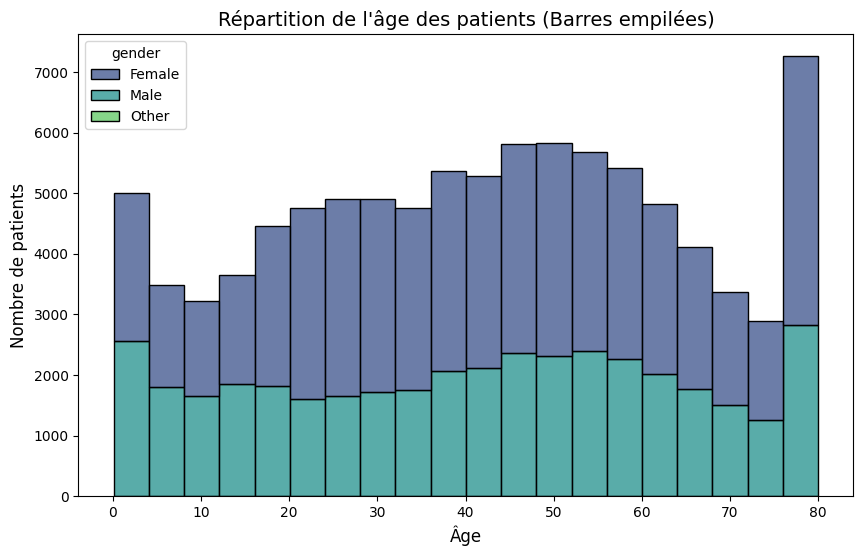

In [ ]:
# Vérifier que la colonne 'age' est bien numérique
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Création de l'histogramme empilé (stacked) en fonction du genre
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='gender', multiple='stack', bins=20, palette='viridis')

# Ajout de titres et labels
plt.title("Répartition de l'âge des patients (Barres empilées)", fontsize=14)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Nombre de patients", fontsize=12)

# Afficher le graphique
plt.show()

#### Explication :
#### sns.histplot() : Utilisé pour créer un histogramme.
#### hue='gender' : Sépare les barres en fonction du sexe (Male/Female).
#### multiple='stack' : Permet d’empiler les barres.
#### bins=20 : Définit le nombre d’intervalles pour l’âge.
#### palette='viridis' : Ajoute une couleur agréable pour la distinction.


## 22.Tracez un boxplot du BMI pour visualiser la dispersion des valeurs et détecter les valeurs aberrantes.

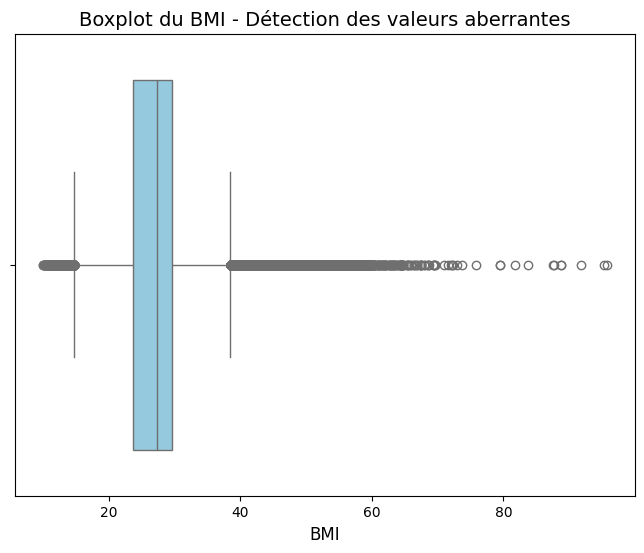

In [85]:
# Vérifier que la colonne 'bmi' est bien numérique
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')

# Création du boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['bmi'], color="skyblue")

# Ajout de titres et labels
plt.title("Boxplot du BMI - Détection des valeurs aberrantes", fontsize=14)
plt.xlabel("BMI", fontsize=12)

# Afficher le graphique
plt.show()

## SUPRESSION DES VALEURS ABERANTE

In [92]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Supprimer les valeurs aberrantes
data_clean = data[(data['bmi'] >= borne_inf) & (data['bmi'] <= borne_sup)]

#### Interprétation du boxplot :
#### La boîte (Q1 → Q3) 📦 représente l’écart interquartile (IQR).
#### La ligne au centre est la médiane (Q2).
#### Les moustaches (whiskers) montrent la plage normale des données.
#### Les points en dehors des moustaches 🟠 sont des valeurs aberrantes (outliers).
#### Si tu observes beaucoup de points éloignés des moustaches, ton dataset contient des valeurs extrêmes qui méritent une analyse plus approfondie.



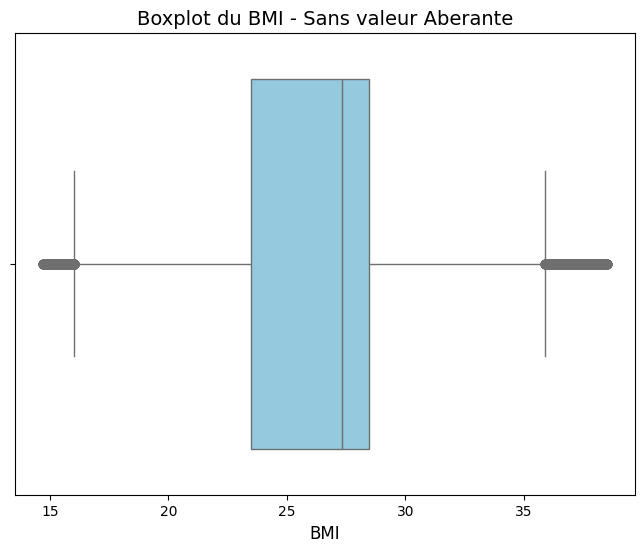

In [95]:
data.head()# Vérifier que la colonne 'bmi' est bien numérique
data_clean.loc[:,'bmi'] = pd.to_numeric(data_clean['bmi'], errors='coerce')

# Création du boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_clean['bmi'], color="skyblue")

# Ajout de titres et labels
plt.title("Boxplot du BMI - Sans valeur Aberante", fontsize=14)
plt.xlabel("BMI", fontsize=12)

# Afficher le graphique
plt.show()

## 22.Tracez un boxplot du BMI pour visualiser la dispersion des valeurs et détecter les valeurs aberrantes.

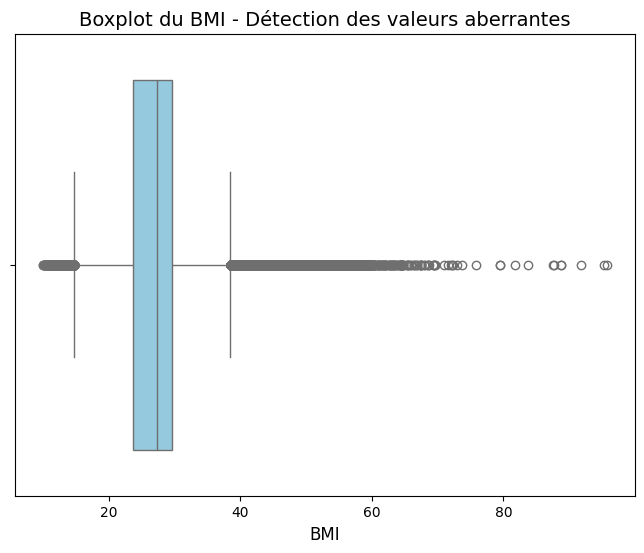

In [76]:
# Vérifier que la colonne 'bmi' est bien numérique
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')

# Création du boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['bmi'], color="skyblue")

# Ajout de titres et labels
plt.title("Boxplot du BMI - Détection des valeurs aberrantes", fontsize=14)
plt.xlabel("BMI", fontsize=12)

# Afficher le graphique
plt.show()

<ipython-input-96-62e9ae93b0e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['smoking_history'], palette="viridis", order=data['smoking_history'].value_counts().index)


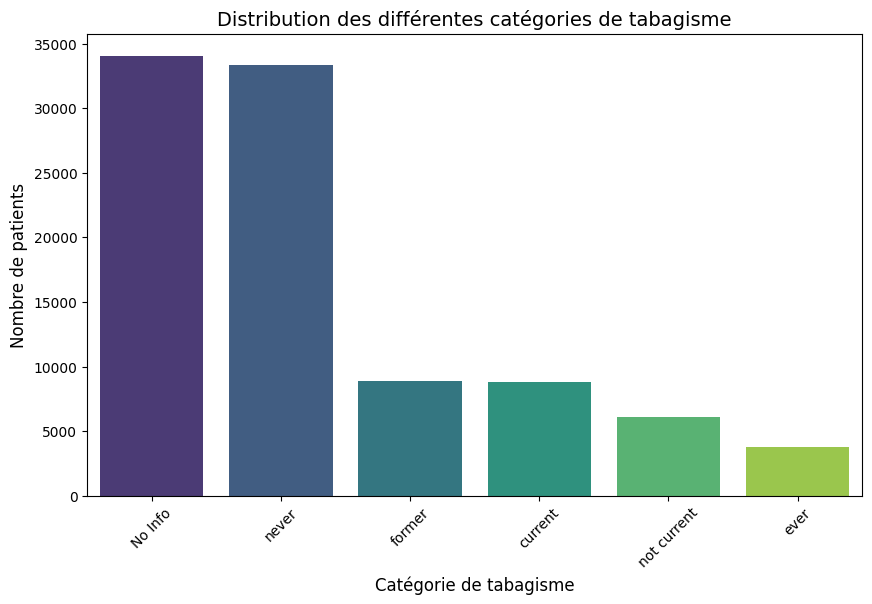

In [96]:
# Vérifier que la colonne 'smoking_history' existe
if 'smoking_history' in data.columns:
    plt.figure(figsize=(10, 6))

    # Création du graphique à barres
    sns.countplot(x=data['smoking_history'], palette="viridis", order=data['smoking_history'].value_counts().index)

    # Ajout des titres et labels
    plt.title("Distribution des différentes catégories de tabagisme", fontsize=14)
    plt.xlabel("Catégorie de tabagisme", fontsize=12)
    plt.ylabel("Nombre de patients", fontsize=12)
    plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité

    # Affichage du graphique
    plt.show()
else:
    print("La colonne 'smoking_history' n'existe pas dans le dataset.")

### EXPLICATION CODE:
### sns.countplot() : Crée un graphique à barres basé sur le nombre d'occurrences de chaque catégorie.
### palette="viridis" : Ajoute un joli dégradé de couleurs.
### order=data['smoking_history'].value_counts().index : Trie les catégories en fonction du nombre d’occurrences.
### plt.xticks(rotation=45) : Fait pivoter les étiquettes pour éviter le chevauchement.

###  Interprétation
### Une catégorie dominante signifie que la majorité des patients partagent le même statut de tabagisme.
### Si certaines catégories sont très rares, elles pourraient être fusionnées sous une catégorie "Autres".

## 24.Représentez un graphique en camembert (pie chart) pour montrer la répartition des patients en fonction de leur statut diabétique

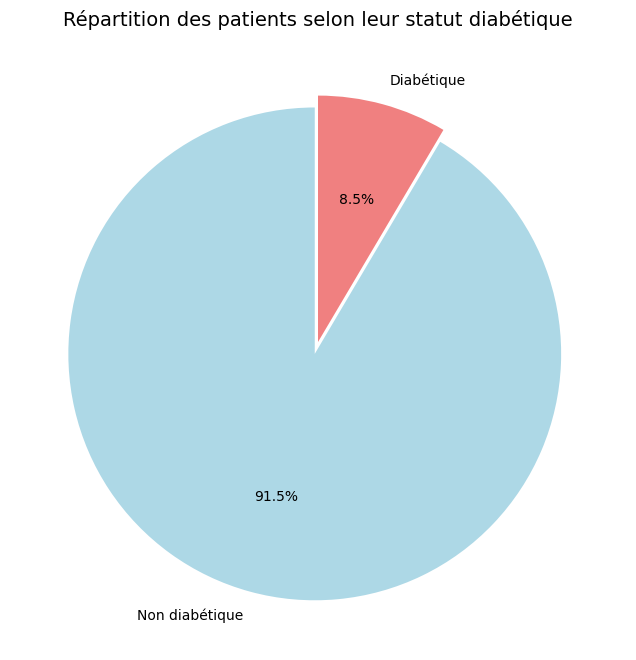

In [97]:
# Vérifier que la colonne 'diabetes' existe
if 'diabetes' in data.columns:
    # Compter le nombre de patients diabétiques (1) et non diabétiques (0)
    diabetes_counts = data['diabetes'].value_counts()

    # Définir les étiquettes (0 = Non diabétique, 1 = Diabétique)
    labels = ["Non diabétique", "Diabétique"]

    # Création du camembert
    plt.figure(figsize=(8, 8))
    plt.pie(
        diabetes_counts,
        labels=labels,
        autopct='%1.1f%%',  # Affichage des pourcentages
        colors=["lightblue", "lightcoral"],  # Couleurs
        startangle=90,  # Angle de départ du graphique
        explode=(0.05, 0)  # Décalage du premier segment pour effet visuel
    )

    # Ajouter un titre
    plt.title("Répartition des patients selon leur statut diabétique", fontsize=14)

    # Afficher le graphique
    plt.show()
else:
    print("La colonne 'diabetes' n'existe pas dans le dataset.")

### value_counts() : Compte les patients diabétiques (1) et non diabétiques (0).
### Création du graphique avec plt.pie() :
### labels=labels : Nomme les catégories.
### autopct='%1.1f%%' : Affiche les pourcentages sur le graphique.
### colors=["lightblue", "lightcoral"] : Ajoute des couleurs.
### startangle=90 : Oriente le camembert pour une meilleure lisibilité.
### explode=(0.05, 0) : Décale légèrement la première tranche pour mettre en valeur les non-diabétiques.


### Interpretaiton
###  91.5% des patients sont non diabétiques et 8.5% sont diabétiques


# Visualisation Bivariée et Corrélation

## 25.Affichez un heatmap de corrélation entre toutes les variables numériques.

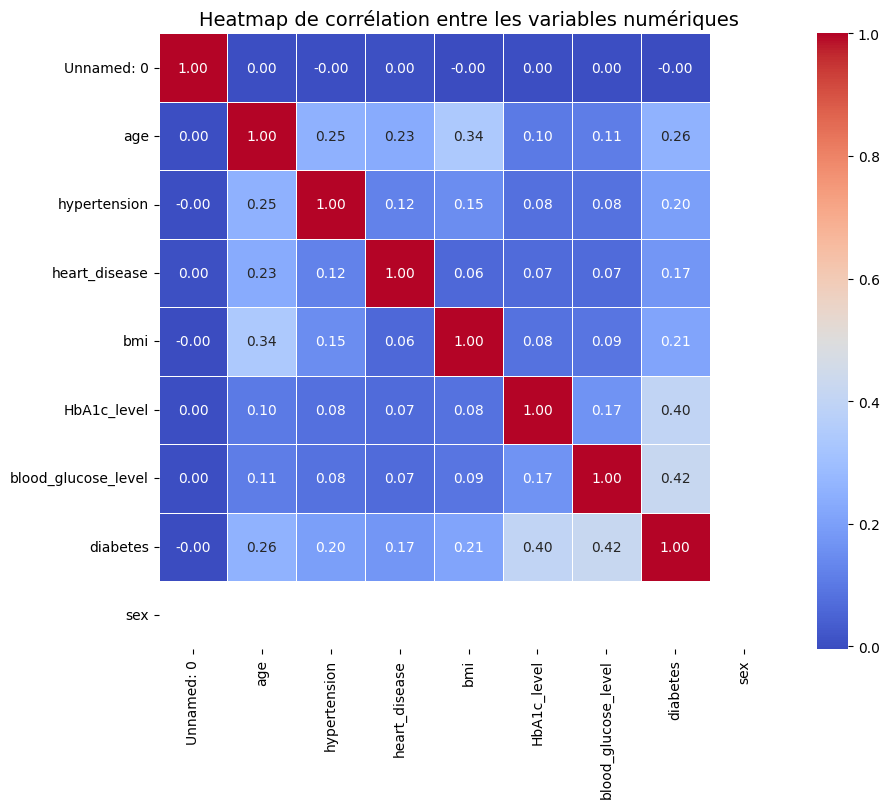

In [98]:
# Sélectionner uniquement les variables numériques
data_numeric = data.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
correlation_matrix = data_numeric.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Afficher les coefficients de corrélation
    fmt=".2f",  # Format des nombres
    cmap="coolwarm",  # Palette de couleurs
    linewidths=0.5  # Espacement entre les cases
)

# Ajouter un titre
plt.title("Heatmap de corrélation entre les variables numériques", fontsize=14)

# Afficher le graphique
plt.show()

### Création de la heatmap avec seaborn.heatmap()
### annot=True : Affiche les valeurs numériques sur la heatmap.
### fmt=".2f" : Affiche les valeurs avec deux décimales.
### cmap="coolwarm" : Utilise une palette de couleurs (bleu = corrélation négative, rouge = positive).
### linewidths=0.5 : Ajoute des espaces entre les cases pour améliorer la lisibilité.

### Interprétation
### Corrélation proche de +1 → Les variables évoluent dans le même sens.
### Corrélation proche de -1 → Les variables évoluent dans des sens opposés.
### Corrélation proche de 0 → Pas de relation significative entre les variables.
### Exemple attendu :

### age et BMI peuvent être faiblement corrélés.
### glucose et diabetes peuvent avoir une corrélation forte.

### 26.Tracez un scatter plot pour observer la relation entre le BMI et le niveau de HbA1c.


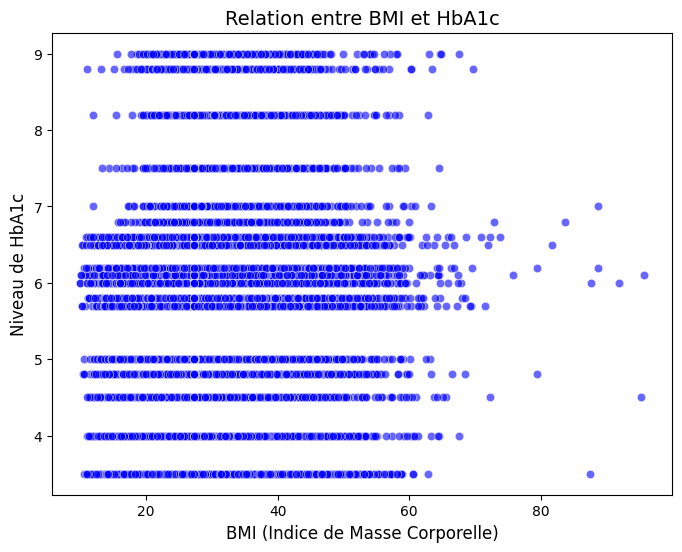

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier si les colonnes 'bmi' et 'HbA1c_level' existent
if 'bmi' in data.columns and 'HbA1c_level' in data.columns:
    plt.figure(figsize=(8, 6))

    # Création du scatter plot
    sns.scatterplot(
        x=data['bmi'],
        y=data['HbA1c_level'],
        alpha=0.6,  # Transparence des points pour une meilleure lisibilité
        color="blue"
    )

    # Ajouter des labels et un titre
    plt.xlabel("BMI (Indice de Masse Corporelle)", fontsize=12)
    plt.ylabel("Niveau de HbA1c", fontsize=12)
    plt.title("Relation entre BMI et HbA1c", fontsize=14)

    # Afficher le graphique
    plt.show()
else:
    print("Les colonnes 'bmi' et/ou 'HbA1c_level' n'existent pas dans le dataset.")

### Interprétation
### Si une corrélation positive existe, on verra une tendance ascendante (plus le BMI est élevé, plus le niveau de HbA1c augmente).
### Si aucune relation n’existe, les points seront répartis de manière aléatoire.
### Exemple attendu :

### Les patients en surpoids/obèses pourraient avoir un HbA1c plus élevé, indiquant un risque de diabète.


### 27.Utilisez un boxplot pour comparer le taux de glucose sanguin entre les patients diabétiques et non-diabétiques.


In [107]:
data.columns

Index(['Unnamed: 0', 'gender', 'age', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'diabetes', 'sex', 'bmi_category', 'HbA1c_category',
       'Glucose_category'],
      dtype='object')

<ipython-input-108-3c1216b81c4c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


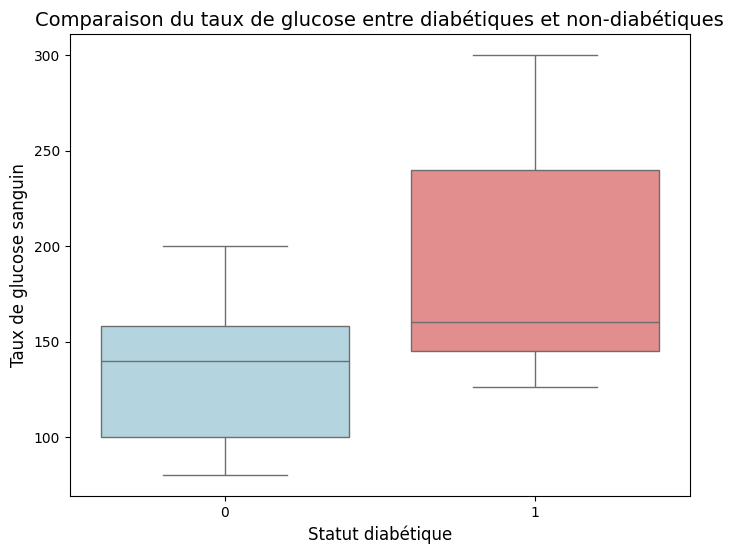

In [108]:
# Vérifier que les colonnes 'diabetes' et 'blood_glucose_level' existent dans le dataset
if 'diabetes' in data.columns and 'blood_glucose_level' in data.columns:
    plt.figure(figsize=(8, 6))

    # Création du boxplot pour comparer le taux de glucose entre diabétiques et non-diabétiques
    sns.boxplot(
        x=data['diabetes'],  # Statut diabétique (0 = Non diabétique, 1 = Diabétique)
        y=data['blood_glucose_level'],  # Taux de glucose sanguin
        palette=["lightblue", "lightcoral"],  # Couleurs pour les catégories
        showfliers=True  # Afficher les valeurs aberrantes
    )

    # Ajouter des labels et un titre
    plt.xlabel("Statut diabétique", fontsize=12)
    plt.ylabel("Taux de glucose sanguin", fontsize=12)
    plt.title("Comparaison du taux de glucose entre diabétiques et non-diabétiques", fontsize=14)

    # Afficher le graphique
    plt.show()
else:
    print("Les colonnes 'diabetes' et/ou 'blood_glucose_level' n'existent pas dans le dataset.")

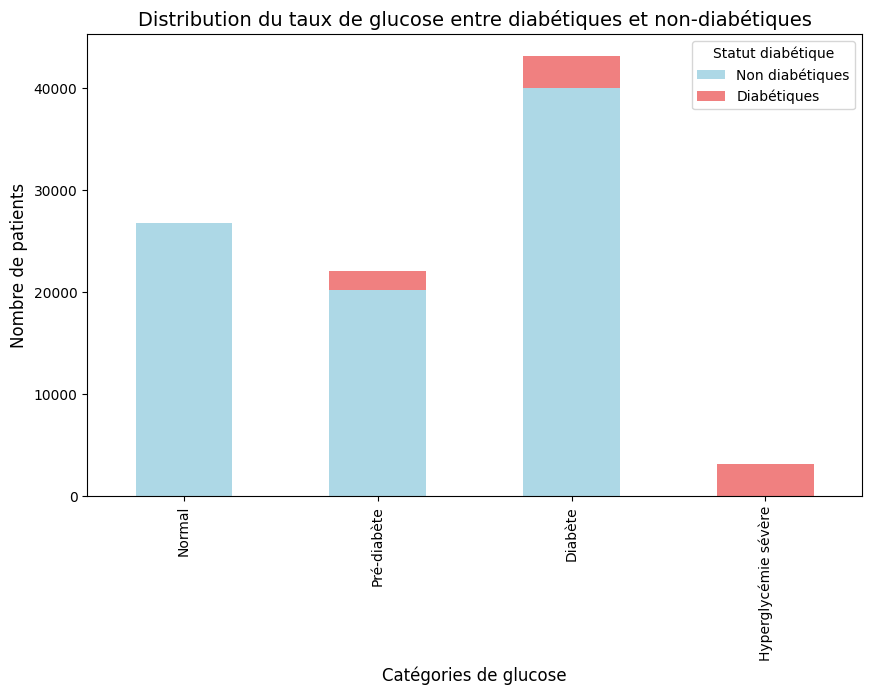

In [109]:
# Assurez-vous que les colonnes 'diabetes' et 'Glucose_category' existent
if 'diabetes' in data.columns and 'Glucose_category' in data.columns:
    # Créer une table de fréquence pour la répartition des catégories de glucose par statut diabétique
    glucose_distribution = pd.crosstab(data['Glucose_category'], data['diabetes'], margins=False)

    # Renommer les colonnes pour plus de clarté
    glucose_distribution.columns = ['Non diabétiques', 'Diabétiques']

    # Tracer un stacked bar chart
    glucose_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightcoral'])

    # Ajouter des labels et un titre
    plt.xlabel("Catégories de glucose", fontsize=12)
    plt.ylabel("Nombre de patients", fontsize=12)
    plt.title("Distribution du taux de glucose entre diabétiques et non-diabétiques", fontsize=14)

    # Afficher la légende
    plt.legend(title='Statut diabétique', loc='upper right')

    # Afficher le graphique
    plt.show()
else:
    print("Les colonnes 'diabetes' et/ou 'Glucose_category' n'existent pas dans le dataset.")

### 28.Réalisez un violin plot pour analyser la distribution du BMI en fonction du statut diabétique.

<ipython-input-110-f06fd14207b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


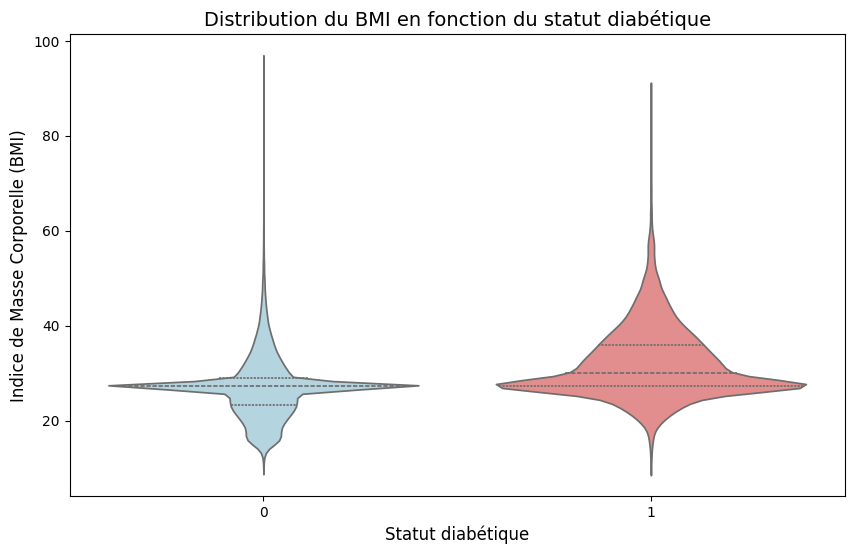

In [110]:
if 'diabetes' in data.columns and 'bmi' in data.columns:
    plt.figure(figsize=(10, 6))

    # Création du violin plot
    sns.violinplot(
        x=data['diabetes'],  # Statut diabétique (0 = Non diabétique, 1 = Diabétique)
        y=data['bmi'],       # Indice de Masse Corporelle (BMI)
        palette=["lightblue", "lightcoral"],  # Couleurs pour les catégories
        inner="quart",  # Affiche les quartiles et la médiane à l'intérieur du violon
        linewidth=1.25   # Épaisseur des bords du violon
    )

    # Ajouter des labels et un titre
    plt.xlabel("Statut diabétique", fontsize=12)
    plt.ylabel("Indice de Masse Corporelle (BMI)", fontsize=12)
    plt.title("Distribution du BMI en fonction du statut diabétique", fontsize=14)

    # Afficher le graphique
    plt.show()
else:
    print("Les colonnes 'diabetes' et/ou 'bmi' n'existent pas dans le dataset.")

###  Interprétation
### Le violin plot combine les caractéristiques d'un boxplot et d'un density plot. Cela permet de voir la forme de la distribution (symétrique, bimodale, etc.), la densité des valeurs de BMI pour chaque groupe, ainsi que la médiane et les quartiles.
### Si les patients diabétiques ont des valeurs de BMI significativement plus élevées que les non-diabétiques, le violon pour les diabétiques sera plus large et peut-être déplacé vers des valeurs plus élevées.